In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


# Future Only Portfolio

In [2]:
ES1 = Future("ES1")
DX1 = Future("DX1")
FF1 = Future("FF1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
FF4 = Future("FF4")
DBC = ETF("DBC")

all_futures = [ES1, DX1, FF1, SI1, CL1, NG1, GC1]


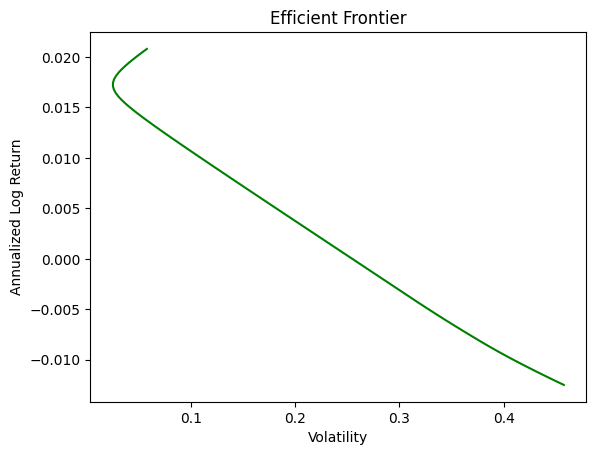

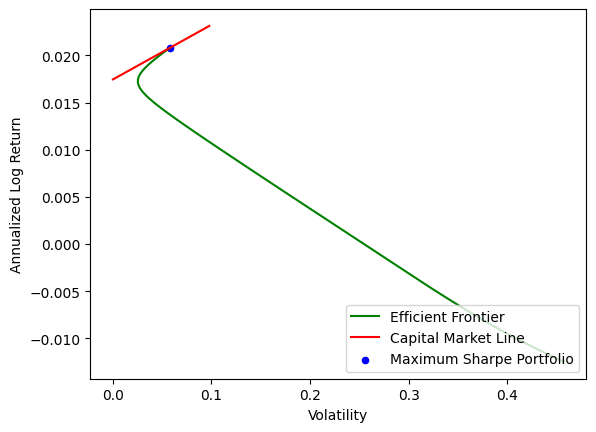

In [3]:
portfolio = Portfolio(all_futures, rf = get_risk_free_rate('2008-05-06'), future_benchmark = DBC)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.plot_ef(n_points = 100)


In [4]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [-0.00488496  0.5         0.5        -0.00144992 -0.06473017 -0.0044873
  0.07555234]
MSR portfolio expected annualized log return: 0.020800284007434645
MSR portfolio annualized volatility of log returns: 0.057816052378806396
Sharpe Ratio of Portfolio: 0.058000680879125285
MSR portfolio VaR: 0.09509894345129599
MSR portfolio ES: 0.11925791172128412



In [5]:
# Filters data to only 2024 election cycle
portfolio.filter(startDate="2024-01-01", endDate="2025-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2024-05-07'))
# See how the calculated weights using data up to and including 2020 election would have worked
# for the 2024 election
print("2024 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2023 (6.5 month period of a non-election year)
portfolio.filter(startDate="2023-05-05", endDate="2023-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2023-05-05'))
print("2023 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 6 to November 18 of 2022 (6.5 month period of a non-election year)
portfolio.filter(startDate="2022-05-06", endDate="2022-11-18", period=-1)
portfolio.set_rf(get_risk_free_rate('2022-05-06'))
print("2022 May 6 to November 18 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 7 to November 19 of 2021 (6.5 month period of a non-election year)
portfolio.filter(startDate="2021-05-07", endDate="2021-11-19", period=-1)
portfolio.set_rf(get_risk_free_rate('2021-05-07'))
print("2021 May 7 to November 19 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


2024 election period actual annualized log returns: 0.04468170559407997
2023 May 5 to November 17 actual annualized log returns: 9.952208320057002e-05
2022 May 6 to November 18 actual annualized log returns: 0.02795098265940173
2021 May 7 to November 19 actual annualized log returns: 0.027921814477275077
